In [1]:
import numpy as np
import time
import sys
sys.path.append('D:/software_git_repos/cofe-python-analysis-tools/utils_meinhold')
sys.path.append('D:/software_git_repos/cofe-python-analysis-tools/utils_zonca')
sys.path.append('D:/software_git_repos/lab_utilities/IO_3001_USB_acquisition')
sys.path.append('C:\\Anaconda3\\envs\\py27\\Scripts')
sys.path.append('D:/software_git_repos/greenpol/telescope_control/data_aquisition')
sys.path.append('D:/software_git_repos/greenpol/telescope_control')
sys.path.append('D:/software_git_repos/greenpol')
from daq import daqDevice
import daqh
import matplotlib.pyplot as plt
import get_pointing_stupid as gp
import random

In [2]:
from glob import glob
import os
import cofe_util as cu
import demod
import h5py
import cPickle
import numpy as np
from numpy.lib import recfunctions as recf
import matplotlib.pyplot as plt
from plot_path import *
from realtime_gp import *
from prm_util import nps
import time
import scipy.interpolate

In [11]:
# Device name as registered with the Windows driver.
dev=daqDevice('DaqBoard3031USB')

In [12]:
# Programmable amplifier with gain of 1.
gain = daqh.DgainX1

In [13]:
# Bipolar-voltage differential input, unsigned-integer readout.
flags = (
    daqh.DafAnalog | daqh.DafUnsigned  # Default flags.
    | daqh.DafBipolar | daqh.DafDifferential  # Nondefault flags.
    )

In [14]:
# max_voltage and bit_depth are device specific.
# Our device's bipolar voltage range is -10.0 V to +10.0 V.
max_voltage = 10.0
# Our device is a 16 bit ADC.
bit_depth = 16

In [15]:
# Input channel number.
channel = 1
if channel > 7:
    channel = 256 + channel - 8

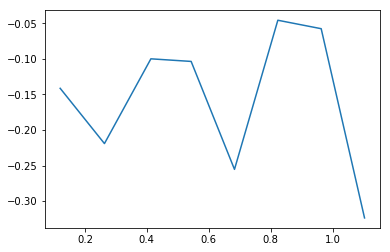

In [16]:
st = time.time()
ct = st
dt = 1.

volts = []
t = []

while ct < st + dt:
    
    # Read one sample.
    data = dev.AdcRd(channel, gain, flags)
    # Convert sample from unsigned integer value to bipolar voltage.
    data = data*max_voltage*2/(2**bit_depth) - max_voltage
    volts.append(data)
    
    ct = time.time()
    t.append(ct - st)
    
plt.plot(t, volts)
plt.show()

    
#t2 = time.time()
#print t2-t1

In [17]:
dev.Close()

In [4]:
#start plotting

In [115]:
steps = 1000
x, y = np.linspace(0., 360., steps), np.linspace(0., 90., steps)
data = np.linspace(0., 1000., steps)
az, t = np.meshgrid(x, y)

In [116]:
z = np.zeros(len(y)*len(x))
sig = np.reshape(z, (len(y), len(x)))

In [117]:
epsilon = 1e-6
it = np.where(abs(t - y) < epsilon)[0]
iaz = np.where(abs(az.T - x) < epsilon)[0]

In [114]:
print len(y), len(t.T)

2000 1000


In [35]:
for i in range(steps):
    sig[it[i]][iaz[i]] = data[i]

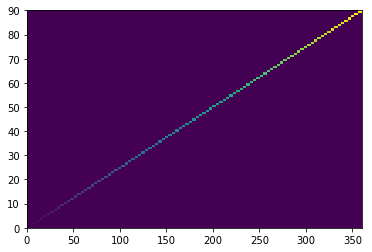

In [30]:
plt.pcolormesh(az, t, sig)
plt.show()

In [5]:
def round_fraction(number, res):
    amount = int(number/res)*res
    remainder = number - amount
    return amount if remainder < res/2. else amount+res

In [24]:
yrmoday='20170907'
fpath='D:/software_git_repos/greenpol/telescope_control/data_aquisition/'
chan='ch4'
var='T'
st_hour = 18
st_minute = 15
ed_hour = 23
ed_minute = 59

In [57]:
yrmoday='20170911'
fpath='D:/software_git_repos/greenpol/telescope_control/data_aquisition/'
chan='ch4'
var='T'
st_hour = 0
st_minute = 0
ed_hour = 23
ed_minute = 59

In [339]:
print yrmoday

20170907


In [14]:
fld=glob.glob(fpath+'data/'+yrmoday+'/*.dat')
fld.sort()
stats=os.stat(fld[-1])
if stats.st_size == 10752000:
    dr=demod.read_raw([fld[-1]],supply_index=False)

0
16


In [5]:
jnk=np.array(dr[0]['ch0'])

In [6]:
alldata=np.concatenate(dr['ch0'])

In [7]:
len(alldata)

256000

In [8]:
ps=cu.nps(alldata,30*256,1)

In [25]:
pylab

<module 'matplotlib.pylab' from 'C:\Users\labuser\Anaconda\envs\py27\lib\site-packages\matplotlib\pylab.pyc'>

In [57]:
plt.figure()
plt.plot(ps[0],ps[1])
#plt.show()

NameError: name 'ps' is not defined

0
16


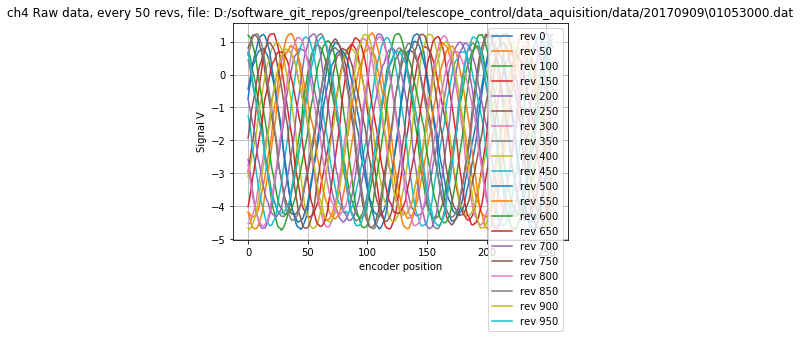

KeyboardInterrupt: 

In [20]:
plotrawnow(yrmoday,chan,var,fpath,rstep=50,supply_index=False)


In [26]:
flp=select_h5(fpath,yrmoday,st_hour,st_minute,ed_hour,ed_minute)
fld=select_dat(fpath,yrmoday,st_hour,st_minute,ed_hour,ed_minute)

In [27]:
i = 0
while len(flp)<3:
    i+=1
    flp=select_h5(fpath,yrmoday,st_hour,int(st_minute)-i,ed_hour,int(ed_minute)+i)


In [28]:
pp=get_h5_pointing(flp)
dd=get_demodulated_data_from_list(fld,supply_index=False)

0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16
0
16


In [113]:
combined=combine_cofe_h5_pointing(dd,pp)

In [114]:
az1 = combined['az']
data1 = combined['sci_data'][chan][var]
el1 = combined['el']
steps = len(data1)

In [172]:
#plt.plot(az1, data)
#plt.plot(time1, data)
plt.plot(time1, az1)
plt.show()

NameError: name 'time1' is not defined

In [173]:
#az vs revolution vs signal plot

In [76]:
dx = 1.0
#dy = len(rev)/(res - 1.)
dy = 1.0

In [77]:
data = []
az = []
iaz = [0]
rev = 0
for i in range(steps):
    az1[i] = round_fraction(az1[i], dx)
    if i > 0:
        if abs(az1[i] - az1[i-1]) >= 180.:
            iaz.append(i)
            rev += 1
            
for j in range(rev):
    az.append(az1[iaz[j]:iaz[j+1]])
    data.append(data1[iaz[j]:iaz[j+1]])
    
data.append(data1[iaz[-1]:])
az.append(az1[iaz[-1]:])
rev += 1
            
data = np.asarray(data)
az = np.asarray(az)

#force each az/data to be the length of x (below) and have 0 values everywhere where there isnt data, 
#there will be places where 

In [78]:
x, y = np.arange(0., 360.+dx, dx), np.arange(0., rev - 1 + dy, dy)
AZ, REV = np.meshgrid(x, y)

In [79]:
z = np.zeros(len(x)*len(y))
sig = np.reshape(z, (len(y), len(x)))

In [80]:
epsilon = 1e-6

In [81]:
# build up sig array based on what data point corresponds to what az, forget about organizing az

In [99]:
l1 = 0
l2 = 0
l3 = 0
for r in range(rev):
    for a in range(len(x)):
        idx = np.where(abs(az[r] - x[a]) < epsilon)[0]

        sig[r][a] = data[r][idx].mean()
        
            


#checking to make sure i got all the values
print (l1 + l2 + l3)/(rev*len(x))
            

C:\Users\labuser\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:8: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


0


In [101]:
plt.pcolormesh(AZ, REV, sig)
plt.colorbar(label = 'Signal, V')
plt.clim(data1.min(),data1.max())
plt.axis([0., 360., 0., rev-1])
plt.ylabel('revolution #')
plt.xlabel('azimuth (deg)')
plt.title('channel %s %s data binned to azimuth and revolution #, date %s' % (chan, var, fld[-1][-21:-13]))
plt.grid()
#plt.show()

In [104]:
#az v el v signal plot

In [115]:
dx = 1.0
#dy = len(rev)/(res - 1.)
dy = 1.0

In [116]:
x, y = np.arange(0., 360.+dx, dx), np.arange(0., 90. + dy, dy)
AZ, EL = np.meshgrid(x, y)

In [117]:
epsilon = 1e-6

In [108]:
for i in range(steps):
    el1[i] = round_fraction(el1[i], dy)
    az1[i] = round_fraction(az1[i], dx)

In [118]:

z1 = np.zeros(len(x)*len(y))
z2 = np.zeros(len(x)*len(y))
sig = np.reshape(z1, (len(y), len(x)))
count = np.reshape(z2, (len(y), len(x)))

for i in range(steps):
    
    el1[i] = round_fraction(el1[i], dy)
    az1[i] = round_fraction(az1[i], dx)    
    
    iel = np.where(abs(y - el1[i]) < epsilon)[0][0]
    iaz = np.where(abs(x - az1[i]) < epsilon)[0][0]
    
    count[iel][iaz] += 1
    

    
    sig[iel][iaz] = sig[iel][iaz] + data1[i]  

count = ma.masked_where(count == 0.0, count)
sig = sig/count



C:\Users\labuser\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in divide


In [119]:
plt.pcolormesh(AZ, EL, sig)
plt.colorbar(label = 'Signal, V')
plt.clim(data1.min(),data1.max())
plt.axis([0., 360., 0., 90.])
plt.ylabel('elevation (deg)')
plt.xlabel('azimuth (deg)')
plt.title('channel %s %s data binned to azimuth and elevation, date %s' % (chan, var, fld[-1][-21:-13]))
plt.grid()
#plt.show()

In [50]:
print sig.min(), sig.max()
print data1.min(), data1.max()

nan nan
-1.32572412491 0.565005540848


In [147]:
#plt.plot(az1)
#plt.plot(el1)
plt.plot(az1, data1)

In [60]:
a = az1
b = data1

b = [x for _,x in sorted(zip(a,b))]

a = sorted(a)

In [61]:
plt.plot(a, b)

In [63]:
a = np.array([])


<type 'numpy.float64'>
